In [1]:
!pip install pandas_profiling

In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score


df = pd.read_csv('churn_data.csv')

C:\Users\farra\AppData\Local\Temp\ipykernel_8196\1216741805.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [4]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [5]:
# converts total charges from string to float
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True)
df['Total Charges'] = df['Total Charges'].astype(float)
#choosing variables apart from latitude, longitude, zip code
df1 = df[['Country', 'State', 'City','Zip Code', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method','Monthly Charges', 'Total Charges','Churn Value']]

In [6]:
#one hot encodeing all variables
df_encoded = pd.get_dummies(df1, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'])

In [7]:
df_encoded

,Country,State,City,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,United States,California,Los Angeles,90003,33.964131,-118.272783,2,53.85,108.15,1,...,0,1,0,0,0,1,0,0,0,1
1,United States,California,Los Angeles,90005,34.059281,-118.307420,2,70.70,151.65,1,...,0,1,0,0,0,1,0,0,1,0
2,United States,California,Los Angeles,90006,34.048013,-118.293953,8,99.65,820.50,1,...,1,1,0,0,0,1,0,0,1,0
3,United States,California,Los Angeles,90010,34.062125,-118.315709,28,104.80,3046.05,1,...,1,1,0,0,0,1,0,0,1,0
4,United States,California,Los Angeles,90015,34.039224,-118.266293,49,103.70,5036.30,1,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,United States,California,Landers,92285,34.341737,-116.539416,72,21.15,1419.40,0,...,0,0,0,1,0,1,1,0,0,0
7039,United States,California,Adelanto,92301,34.667815,-117.536183,24,84.80,1990.50,0,...,1,0,1,0,0,1,0,0,0,1
7040,United States,California,Amboy,92304,34.559882,-115.637164,72,103.20,7362.90,0,...,1,0,1,0,0,1,0,1,0,0
7041,United States,California,Angelus Oaks,92305,34.167800,-116.864330,11,29.60,346.45,0,...,0,1,0,0,0,1,0,0,1,0


In [8]:
#Dropping dummy variables
df_encoded = df_encoded.drop(['Multiple Lines_No phone service', 'Online Security_No internet service', 'Online Backup_No internet service','Device Protection_No internet service', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Gender_Female', 'Senior Citizen_No', 'Partner_No', 'Paperless Billing_No', 'Dependents_No', 'Phone Service_No', 'Multiple Lines_No', 'Internet Service_No', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Tech Support_No', 'Streaming TV_No', 'Streaming Movies_No', 'Contract_One year', 'Payment Method_Mailed check'], axis = 1)
# Scaling continuous variable
scaler = StandardScaler()
df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges']] = scaler.fit_transform(df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges']])
df_encoded.head()

,Country,State,City,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,...,Device Protection_Yes,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_Month-to-month,Contract_Two year,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check
0,United States,California,Los Angeles,90003,33.964131,-118.272783,-1.236724,-0.362660,-0.959649,1,...,0,0,0,0,1,0,1,0,0,0
1,United States,California,Los Angeles,90005,34.059281,-118.307420,-1.236724,0.197365,-0.940457,1,...,0,0,0,0,1,0,1,0,0,1
2,United States,California,Los Angeles,90006,34.048013,-118.293953,-0.992402,1.159546,-0.645369,1,...,1,0,1,1,1,0,1,0,0,1
3,United States,California,Los Angeles,90010,34.062125,-118.315709,-0.177995,1.330711,0.336516,1,...,1,1,1,1,1,0,1,0,0,1
4,United States,California,Los Angeles,90015,34.039224,-118.266293,0.677133,1.294151,1.214589,1,...,1,0,1,1,1,0,1,1,0,0



from sklearn.svm import SVR

df_encoded = df_encoded.dropna()
df_encoded

In [9]:
df_la = df_encoded[df_encoded['Zip Code'] == 90012]
df_la.columns

Index(['Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
       'Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Online Security_Yes',
       'Online Backup_Yes', 'Device Protection_Yes', 'Tech Support_Yes',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Contract_Month-to-month',
       'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check'],
      dtype='object')

In [10]:
import pandas as pd
from math import radians
import math

# Define the central location
central_lat = radians(34.065875)
central_lon = radians(-118.238728)

# Define a function to calculate the Manhattan distance
def manhattan_distance(lat1, lon1, lat2, lon2):
    """Calculate the Manhattan distance between two points."""
    dx = abs(lon2 - lon1) * 6371 * math.cos((lat1 + lat2) / 2)
    dy = abs(lat2 - lat1) * 6371
    return dx + dy

# Apply the function to each row in the DataFrame
df_encoded['manhattan_distance'] = df_encoded.apply(lambda x: manhattan_distance(radians(x['Latitude']), radians(x['Longitude']), central_lat, central_lon), axis=1)

# View the updated DataFrame
df_encoded.head()


,Country,State,City,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,...,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_Month-to-month,Contract_Two year,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,manhattan_distance
0,United States,California,Los Angeles,90003,33.964131,-118.272783,-1.236724,-0.362660,-0.959649,1,...,0,0,0,1,0,1,0,0,0,14.452214
1,United States,California,Los Angeles,90005,34.059281,-118.307420,-1.236724,0.197365,-0.940457,1,...,0,0,0,1,0,1,0,0,1,7.060907
2,United States,California,Los Angeles,90006,34.048013,-118.293953,-0.992402,1.159546,-0.645369,1,...,0,1,1,1,0,1,0,0,1,7.073653
3,United States,California,Los Angeles,90010,34.062125,-118.315709,-0.177995,1.330711,0.336516,1,...,1,1,1,1,0,1,0,0,1,7.508106
4,United States,California,Los Angeles,90015,34.039224,-118.266293,0.677133,1.294151,1.214589,1,...,0,1,1,1,0,1,1,0,0,5.502956


In [11]:
df_encoded[['manhattan_distance']] = scaler.fit_transform(df_encoded[['manhattan_distance']])

In [12]:
df_encoded.dtypes

Country                                      object
State                                        object
City                                         object
Zip Code                                      int64
Latitude                                    float64
Longitude                                   float64
Tenure Months                               float64
Monthly Charges                             float64
Total Charges                               float64
Churn Value                                   int64
Gender_Male                                   uint8
Senior Citizen_Yes                            uint8
Partner_Yes                                   uint8
Dependents_Yes                                uint8
Phone Service_Yes                             uint8
Multiple Lines_Yes                            uint8
Internet Service_DSL                          uint8
Internet Service_Fiber optic                  uint8
Online Security_Yes                           uint8
Online Backu

In [13]:
df_features = df_encoded.drop(['Latitude', 'Longitude', 'Zip Code', 'Country', 'State', 'City'], axis=1)

In [14]:
df_features = df_features.dropna()

# CatBoost Model

In [15]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

data = df_features

X = data.drop(['Churn Value'], axis=1)
y = data['Churn Value']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Oversampling the minority class making it 1:1
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [17]:
# Define the model
catboost_model = CatBoostClassifier(learning_rate=0.053449999541044235, 
                                             depth=6, 
                                             l2_leaf_reg=3)

# Fit the model on the training data
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val))

# Predict on the validation data
val_predictions = catboost_model.predict(X_val)

0:	learn: 0.6625448	test: 0.6606756	best: 0.6606756 (0)	total: 185ms	remaining: 3m 5s
1:	learn: 0.6343008	test: 0.6297502	best: 0.6297502 (1)	total: 191ms	remaining: 1m 35s
2:	learn: 0.6108811	test: 0.6054205	best: 0.6054205 (2)	total: 196ms	remaining: 1m 5s
3:	learn: 0.5941157	test: 0.5885124	best: 0.5885124 (3)	total: 214ms	remaining: 53.2s
4:	learn: 0.5762510	test: 0.5697757	best: 0.5697757 (4)	total: 218ms	remaining: 43.5s
5:	learn: 0.5631695	test: 0.5573788	best: 0.5573788 (5)	total: 223ms	remaining: 37s
6:	learn: 0.5496028	test: 0.5435063	best: 0.5435063 (6)	total: 229ms	remaining: 32.4s
7:	learn: 0.5370159	test: 0.5312418	best: 0.5312418 (7)	total: 234ms	remaining: 29s
8:	learn: 0.5265762	test: 0.5214242	best: 0.5214242 (8)	total: 239ms	remaining: 26.3s
9:	learn: 0.5171500	test: 0.5126402	best: 0.5126402 (9)	total: 244ms	remaining: 24.2s
10:	learn: 0.5105821	test: 0.5077554	best: 0.5077554 (10)	total: 249ms	remaining: 22.4s
11:	learn: 0.5035293	test: 0.5017172	best: 0.5017172 (1

116:	learn: 0.3800886	test: 0.4423876	best: 0.4423876 (116)	total: 911ms	remaining: 6.87s
117:	learn: 0.3797032	test: 0.4424986	best: 0.4423876 (116)	total: 915ms	remaining: 6.84s
118:	learn: 0.3789285	test: 0.4422107	best: 0.4422107 (118)	total: 921ms	remaining: 6.82s
119:	learn: 0.3780981	test: 0.4419109	best: 0.4419109 (119)	total: 926ms	remaining: 6.79s
120:	learn: 0.3776564	test: 0.4418522	best: 0.4418522 (120)	total: 932ms	remaining: 6.77s
121:	learn: 0.3771744	test: 0.4419088	best: 0.4418522 (120)	total: 944ms	remaining: 6.79s
122:	learn: 0.3768356	test: 0.4418907	best: 0.4418522 (120)	total: 949ms	remaining: 6.77s
123:	learn: 0.3764278	test: 0.4418597	best: 0.4418522 (120)	total: 954ms	remaining: 6.74s
124:	learn: 0.3756723	test: 0.4417128	best: 0.4417128 (124)	total: 960ms	remaining: 6.72s
125:	learn: 0.3752151	test: 0.4416464	best: 0.4416464 (125)	total: 965ms	remaining: 6.7s
126:	learn: 0.3745209	test: 0.4414258	best: 0.4414258 (126)	total: 971ms	remaining: 6.67s
127:	learn:

228:	learn: 0.3302346	test: 0.4330293	best: 0.4330293 (228)	total: 1.63s	remaining: 5.5s
229:	learn: 0.3297450	test: 0.4329289	best: 0.4329289 (229)	total: 1.64s	remaining: 5.48s
230:	learn: 0.3294758	test: 0.4330249	best: 0.4329289 (229)	total: 1.64s	remaining: 5.47s
231:	learn: 0.3291117	test: 0.4331254	best: 0.4329289 (229)	total: 1.65s	remaining: 5.46s
232:	learn: 0.3286982	test: 0.4331120	best: 0.4329289 (229)	total: 1.65s	remaining: 5.44s
233:	learn: 0.3283260	test: 0.4329803	best: 0.4329289 (229)	total: 1.66s	remaining: 5.43s
234:	learn: 0.3278078	test: 0.4333013	best: 0.4329289 (229)	total: 1.66s	remaining: 5.42s
235:	learn: 0.3273468	test: 0.4334524	best: 0.4329289 (229)	total: 1.67s	remaining: 5.4s
236:	learn: 0.3269560	test: 0.4334605	best: 0.4329289 (229)	total: 1.67s	remaining: 5.39s
237:	learn: 0.3267126	test: 0.4336352	best: 0.4329289 (229)	total: 1.68s	remaining: 5.38s
238:	learn: 0.3264837	test: 0.4337103	best: 0.4329289 (229)	total: 1.69s	remaining: 5.37s
239:	learn: 

341:	learn: 0.2919995	test: 0.4290872	best: 0.4287237 (329)	total: 2.38s	remaining: 4.59s
342:	learn: 0.2915712	test: 0.4290927	best: 0.4287237 (329)	total: 2.39s	remaining: 4.58s
343:	learn: 0.2913896	test: 0.4291070	best: 0.4287237 (329)	total: 2.39s	remaining: 4.57s
344:	learn: 0.2911617	test: 0.4291648	best: 0.4287237 (329)	total: 2.4s	remaining: 4.55s
345:	learn: 0.2908906	test: 0.4290049	best: 0.4287237 (329)	total: 2.4s	remaining: 4.54s
346:	learn: 0.2906260	test: 0.4291235	best: 0.4287237 (329)	total: 2.41s	remaining: 4.54s
347:	learn: 0.2904305	test: 0.4291023	best: 0.4287237 (329)	total: 2.42s	remaining: 4.53s
348:	learn: 0.2899246	test: 0.4289355	best: 0.4287237 (329)	total: 2.42s	remaining: 4.51s
349:	learn: 0.2897125	test: 0.4289022	best: 0.4287237 (329)	total: 2.43s	remaining: 4.5s
350:	learn: 0.2895008	test: 0.4288050	best: 0.4287237 (329)	total: 2.43s	remaining: 4.5s
351:	learn: 0.2893563	test: 0.4287897	best: 0.4287237 (329)	total: 2.44s	remaining: 4.49s
352:	learn: 0.

456:	learn: 0.2626762	test: 0.4305956	best: 0.4287058 (354)	total: 3.17s	remaining: 3.77s
457:	learn: 0.2624738	test: 0.4306187	best: 0.4287058 (354)	total: 3.18s	remaining: 3.76s
458:	learn: 0.2622465	test: 0.4306156	best: 0.4287058 (354)	total: 3.19s	remaining: 3.75s
459:	learn: 0.2621143	test: 0.4306360	best: 0.4287058 (354)	total: 3.19s	remaining: 3.75s
460:	learn: 0.2618268	test: 0.4307206	best: 0.4287058 (354)	total: 3.2s	remaining: 3.74s
461:	learn: 0.2614711	test: 0.4310498	best: 0.4287058 (354)	total: 3.2s	remaining: 3.73s
462:	learn: 0.2613360	test: 0.4310737	best: 0.4287058 (354)	total: 3.21s	remaining: 3.72s
463:	learn: 0.2611742	test: 0.4310294	best: 0.4287058 (354)	total: 3.21s	remaining: 3.71s
464:	learn: 0.2609732	test: 0.4308633	best: 0.4287058 (354)	total: 3.22s	remaining: 3.7s
465:	learn: 0.2607239	test: 0.4308418	best: 0.4287058 (354)	total: 3.23s	remaining: 3.69s
466:	learn: 0.2605687	test: 0.4308846	best: 0.4287058 (354)	total: 3.23s	remaining: 3.69s
467:	learn: 0

556:	learn: 0.2397595	test: 0.4319321	best: 0.4287058 (354)	total: 3.73s	remaining: 2.97s
557:	learn: 0.2395310	test: 0.4319391	best: 0.4287058 (354)	total: 3.76s	remaining: 2.98s
558:	learn: 0.2393296	test: 0.4318509	best: 0.4287058 (354)	total: 3.77s	remaining: 2.97s
559:	learn: 0.2390610	test: 0.4319516	best: 0.4287058 (354)	total: 3.77s	remaining: 2.96s
560:	learn: 0.2387308	test: 0.4319308	best: 0.4287058 (354)	total: 3.79s	remaining: 2.96s
561:	learn: 0.2385787	test: 0.4319528	best: 0.4287058 (354)	total: 3.81s	remaining: 2.97s
562:	learn: 0.2384337	test: 0.4320266	best: 0.4287058 (354)	total: 3.82s	remaining: 2.97s
563:	learn: 0.2381736	test: 0.4323609	best: 0.4287058 (354)	total: 3.83s	remaining: 2.96s
564:	learn: 0.2379732	test: 0.4322866	best: 0.4287058 (354)	total: 3.83s	remaining: 2.95s
565:	learn: 0.2378506	test: 0.4323131	best: 0.4287058 (354)	total: 3.84s	remaining: 2.94s
566:	learn: 0.2376437	test: 0.4323318	best: 0.4287058 (354)	total: 3.85s	remaining: 2.94s
567:	learn

667:	learn: 0.2179592	test: 0.4359501	best: 0.4287058 (354)	total: 4.46s	remaining: 2.21s
668:	learn: 0.2178634	test: 0.4359740	best: 0.4287058 (354)	total: 4.46s	remaining: 2.21s
669:	learn: 0.2177179	test: 0.4361477	best: 0.4287058 (354)	total: 4.47s	remaining: 2.2s
670:	learn: 0.2174964	test: 0.4361683	best: 0.4287058 (354)	total: 4.47s	remaining: 2.19s
671:	learn: 0.2172260	test: 0.4361218	best: 0.4287058 (354)	total: 4.48s	remaining: 2.19s
672:	learn: 0.2171139	test: 0.4362897	best: 0.4287058 (354)	total: 4.49s	remaining: 2.18s
673:	learn: 0.2170244	test: 0.4362775	best: 0.4287058 (354)	total: 4.5s	remaining: 2.17s
674:	learn: 0.2169046	test: 0.4362588	best: 0.4287058 (354)	total: 4.5s	remaining: 2.17s
675:	learn: 0.2166649	test: 0.4363959	best: 0.4287058 (354)	total: 4.53s	remaining: 2.17s
676:	learn: 0.2164525	test: 0.4365120	best: 0.4287058 (354)	total: 4.54s	remaining: 2.16s
677:	learn: 0.2162339	test: 0.4364981	best: 0.4287058 (354)	total: 4.54s	remaining: 2.16s
678:	learn: 0

776:	learn: 0.1990196	test: 0.4370552	best: 0.4287058 (354)	total: 5.19s	remaining: 1.49s
777:	learn: 0.1987838	test: 0.4370198	best: 0.4287058 (354)	total: 5.2s	remaining: 1.48s
778:	learn: 0.1986667	test: 0.4370273	best: 0.4287058 (354)	total: 5.2s	remaining: 1.48s
779:	learn: 0.1985530	test: 0.4369851	best: 0.4287058 (354)	total: 5.21s	remaining: 1.47s
780:	learn: 0.1983745	test: 0.4369442	best: 0.4287058 (354)	total: 5.21s	remaining: 1.46s
781:	learn: 0.1983022	test: 0.4370604	best: 0.4287058 (354)	total: 5.22s	remaining: 1.45s
782:	learn: 0.1981417	test: 0.4370723	best: 0.4287058 (354)	total: 5.22s	remaining: 1.45s
783:	learn: 0.1978775	test: 0.4372218	best: 0.4287058 (354)	total: 5.23s	remaining: 1.44s
784:	learn: 0.1976803	test: 0.4373417	best: 0.4287058 (354)	total: 5.24s	remaining: 1.43s
785:	learn: 0.1974768	test: 0.4371607	best: 0.4287058 (354)	total: 5.24s	remaining: 1.43s
786:	learn: 0.1972803	test: 0.4369871	best: 0.4287058 (354)	total: 5.25s	remaining: 1.42s
787:	learn: 

884:	learn: 0.1830917	test: 0.4368681	best: 0.4287058 (354)	total: 5.91s	remaining: 768ms
885:	learn: 0.1829198	test: 0.4371045	best: 0.4287058 (354)	total: 5.91s	remaining: 761ms
886:	learn: 0.1827563	test: 0.4371992	best: 0.4287058 (354)	total: 5.92s	remaining: 754ms
887:	learn: 0.1826522	test: 0.4372450	best: 0.4287058 (354)	total: 5.92s	remaining: 747ms
888:	learn: 0.1824889	test: 0.4372917	best: 0.4287058 (354)	total: 5.93s	remaining: 740ms
889:	learn: 0.1823703	test: 0.4374196	best: 0.4287058 (354)	total: 5.94s	remaining: 734ms
890:	learn: 0.1821848	test: 0.4372134	best: 0.4287058 (354)	total: 5.94s	remaining: 727ms
891:	learn: 0.1820687	test: 0.4373778	best: 0.4287058 (354)	total: 5.95s	remaining: 720ms
892:	learn: 0.1819047	test: 0.4375468	best: 0.4287058 (354)	total: 5.95s	remaining: 713ms
893:	learn: 0.1817013	test: 0.4375690	best: 0.4287058 (354)	total: 5.97s	remaining: 707ms
894:	learn: 0.1815550	test: 0.4375333	best: 0.4287058 (354)	total: 5.97s	remaining: 701ms
895:	learn

986:	learn: 0.1690648	test: 0.4386077	best: 0.4287058 (354)	total: 6.64s	remaining: 87.5ms
987:	learn: 0.1689876	test: 0.4386887	best: 0.4287058 (354)	total: 6.65s	remaining: 80.8ms
988:	learn: 0.1688496	test: 0.4387857	best: 0.4287058 (354)	total: 6.66s	remaining: 74ms
989:	learn: 0.1686852	test: 0.4387971	best: 0.4287058 (354)	total: 6.66s	remaining: 67.3ms
990:	learn: 0.1686139	test: 0.4386767	best: 0.4287058 (354)	total: 6.67s	remaining: 60.6ms
991:	learn: 0.1684090	test: 0.4388803	best: 0.4287058 (354)	total: 6.67s	remaining: 53.8ms
992:	learn: 0.1682387	test: 0.4390484	best: 0.4287058 (354)	total: 6.68s	remaining: 47.1ms
993:	learn: 0.1681600	test: 0.4390760	best: 0.4287058 (354)	total: 6.68s	remaining: 40.3ms
994:	learn: 0.1679614	test: 0.4390910	best: 0.4287058 (354)	total: 6.69s	remaining: 33.6ms
995:	learn: 0.1678469	test: 0.4390069	best: 0.4287058 (354)	total: 6.69s	remaining: 26.9ms
996:	learn: 0.1677082	test: 0.4390246	best: 0.4287058 (354)	total: 6.7s	remaining: 20.2ms
99

In [18]:
# Evaluate the model using ROC-AUC score
roc_auc = roc_auc_score(y_val, val_predictions)
print("ROC-AUC Score: ", roc_auc)

ROC-AUC Score:  0.7704958222844849


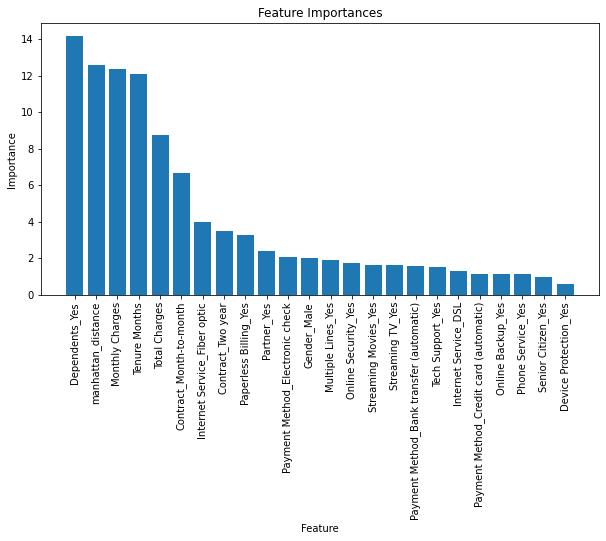

In [19]:
import matplotlib.pyplot as plt

# Get the feature importances with the corresponding feature names
feature_importances = catboost_model.feature_importances_
feature_names = X.columns.tolist()

# Sort the features by importance in descending order
sorted_idx = feature_importances.argsort()[::-1]
feature_importances_sorted = feature_importances[sorted_idx]
feature_names_sorted = [feature_names[i] for i in sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(feature_names_sorted, feature_importances_sorted)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1012
           1       0.58      0.75      0.66       395

    accuracy                           0.78      1407
   macro avg       0.74      0.77      0.75      1407
weighted avg       0.80      0.78      0.79      1407



In [ ]:
import numpy
import shap
import scipy

explainer = shap.Explainer(catboost_model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

In [29]:
def evaluate_model(name, train_preds, test_preds):
    print(f"Evaluation of {name} model:")
    print("Training set:")
    print("F1 Score (Per Class):", f1_score(y_train, np.round(train_preds), average=None))
    print("AUC Score:", roc_auc_score(y_train, train_preds))
    
    cm_train = confusion_matrix(y_train, np.round(train_preds))
    cm_train_percent = cm_train / cm_train.sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_train_percent, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f"Confusion matrix ({name} model) - Training set (Percentages)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("Test set:")
    print("F1 Score (Per Class):", f1_score(y_val, np.round(test_preds), average=None))
    print("AUC Score:", roc_auc_score(y_val, test_preds))
    
    cm_test = confusion_matrix(y_val, np.round(test_preds))
    cm_test_percent = cm_test / cm_test.sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_test_percent, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f"Confusion matrix ({name} model) - Test set (Percentages)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Evaluation of Catboost model:
Training set:
F1 Score (Per Class): [0.88911444 0.89979363]
AUC Score: 0.8947241628523247


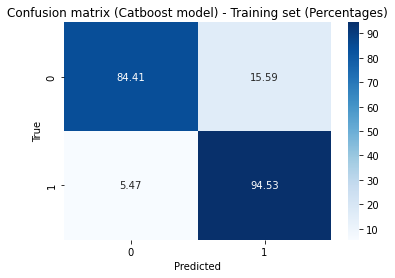

Test set:
F1 Score (Per Class): [0.83569554 0.65566557]
AUC Score: 0.7704958222844849


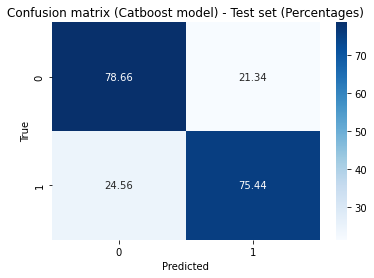

In [28]:
# Predict the target variable on the test set
y_pred = catboost_model.predict(X_val)


# Predict the target variable on the train set
y_pred_train = catboost_model.predict(X_train)

evaluate_model("Catboost", y_pred_train, y_pred)